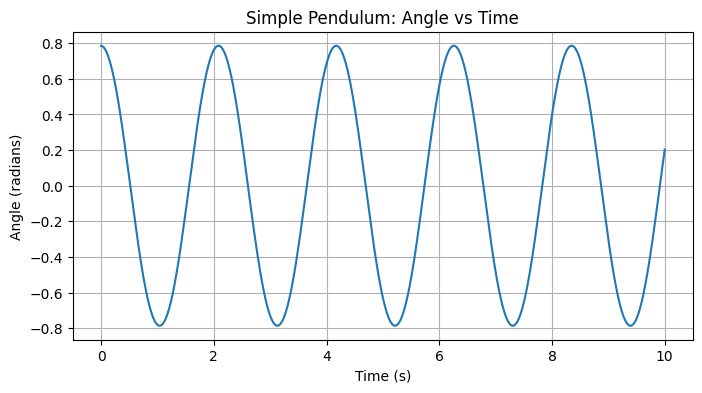

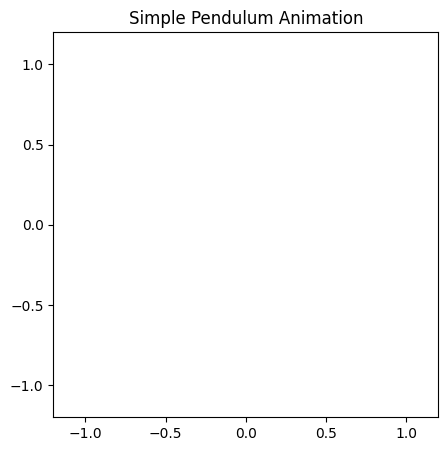

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib inline
from IPython.display import HTML
# ----------------------------------------
# PARAMETERS
# ----------------------------------------
g = 9.81   # Acceleration due to gravity (m/s^2)
L = 1.0    # Length of pendulum (m)
dt = 0.01  # Time step (s)
T = 10     # Total time (s)

# Initial conditions
theta0 = np.pi / 4   # Initial angle (45 degrees in radians)
omega0 = 0.0         # Initial angular velocity

# ----------------------------------------
# TIME ARRAY
# ----------------------------------------
N = int(T / dt)
t = np.linspace(0, T, N)

# ----------------------------------------
# ARRAYS TO STORE RESULTS
# ----------------------------------------
theta = np.zeros(N)
omega = np.zeros(N)

# Set initial values
theta[0] = theta0
omega[0] = omega0

# ----------------------------------------
# EULER METHOD
# ----------------------------------------
for i in range(1, N):
    omega[i] = omega[i-1] - (g/L) * np.sin(theta[i-1]) * dt
    theta[i] = theta[i-1] + omega[i] * dt

# ----------------------------------------
# PLOT ANGLE vs TIME
# ----------------------------------------
plt.figure(figsize=(8, 4))
plt.plot(t, theta)
plt.title("Simple Pendulum: Angle vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Angle (radians)")
plt.grid(True)
plt.show()

# ----------------------------------------
# ANIMATION
# ----------------------------------------
x = L * np.sin(theta)
y = -L * np.cos(theta)

fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlim(-L-0.2, L+0.2)
ax.set_ylim(-L-0.2, L+0.2)
ax.set_aspect('equal')
line, = ax.plot([], [], 'o-', lw=2)
trace, = ax.plot([], [], '-', lw=1, alpha=0.5)  # Optional: trace path

history_x, history_y = [], []

def init():
    line.set_data([], [])
    trace.set_data([], [])
    return line, trace

def update(frame):
    thisx = [0, x[frame]]
    thisy = [0, y[frame]]
    line.set_data(thisx, thisy)
    history_x.append(x[frame])
    history_y.append(y[frame])
    trace.set_data(history_x, history_y)
    return line, trace

ani = FuncAnimation(fig, update, frames=range(0, N, 5),
                    init_func=init, blit=True, interval=dt*1000)

plt.title("Simple Pendulum Animation")
plt.show()
